## PCA & LINEAR REGRESSION

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd
from matplotlib.mlab import PCA
get_ipython().magic(u'matplotlib inline')

## PCA

In [63]:
def my_PCA(x):
    colMean=x.mean(axis=0)
    centeredMean=x-colMean

    #Covariance Matrix
    covMatrix=np.cov(x,rowvar=False)

    # eigendecomposition of the covariance matrix
    eigValues, eigVectors=LA.eig(covMatrix)

    #print('Eigenvalues \n%s' % eigValues)
    #print('\nEigenvectors \n%s' % eigVectors)

    #Sort & order the eigen values and vectors
    eigenIndexes=eigValues.argsort()[::-1]
    eigValues = eigValues[eigenIndexes]
    eigVectors = eigVectors[:, eigenIndexes]

    # scores
    scores = np.dot(centeredMean, eigVectors)
    print(scores)

    #PCA results
    pca_results = {'dataset': x,'centered_mean': centeredMean,'pcVariance': eigValues,'loadings': eigVectors,'scores': scores}

    return pca_results


## LINEAR REGRESSION

In [11]:
def myLinearRegression(data):
    cov_matrix = np.cov(data[:,0], data[:,1])
    covariance =  cov_matrix[1,0]
    variance = cov_matrix[0,0]
    beta1_hat = covariance/variance
    y_mean = np.mean(data[:,1])
    x_mean = np.mean(data[:,0])
    beta0_hat = y_mean - (beta1_hat*x_mean)
    y_predicted =  np.ones_like(data[:,1])
    y_predicted = beta0_hat + (beta1_hat*data[:,0])
    
    lr_results = {'covMatrix': cov_matrix,'covariance': covariance,'variance': variance,'yPredicted': y_predicted}

    return lr_results   

In [ ]:
def sklearn_pca(data, n):
    from sklearn.decomposition import PCA
    pca_sklearn = PCA(n)
    pca_sklearn.fit(data[:,0:2])
    return pca_sklearn.transform(data[:,0:2])

## Reading Dataset

In [25]:
dataset = pd.read_csv("D:\ML\HW1\linear_regression_test_data.csv")
dataset = dataset.as_matrix()[:,1:]

## Performing PCA

In [26]:
cal_pca_result=my_PCA(dataset[:,0:2])

principal_components = cal_pca_result['loadings']

pc1 = principal_components[0]
print(pc1)

[[  4.35166345e+00   3.76797645e-01]
 [  4.66088750e+00  -5.37925041e-05]
 [  4.28403419e+00   1.12017614e-01]
 [  2.15845822e+00  -1.70490107e-01]
 [  2.56237160e+00  -5.46306624e-01]
 [  9.96542098e-01   1.54904911e-01]
 [  8.51502753e-02   1.92825209e-01]
 [  6.64246378e-01  -1.60580269e-01]
 [ -7.24622785e-01   4.98885965e-01]
 [  7.77196226e-01  -3.18698392e-01]
 [ -2.07558107e-01   6.79202949e-03]
 [ -4.88614691e-01  -4.81421425e-02]
 [ -1.88142156e+00   3.22379183e-01]
 [ -2.41608561e+00   3.02786954e-01]
 [ -1.94667138e+00   1.36105932e-02]
 [ -2.41275169e+00   5.88092994e-02]
 [ -2.17819691e+00  -2.21906374e-01]
 [ -1.88156470e+00  -4.63321895e-01]
 [ -2.91798220e+00  -1.08666666e-01]
 [ -3.48508032e+00  -1.64313947e-03]]
[-0.43814047 -0.89890652]


## Performing Linear Regression

In [27]:
cal_LR_result = myLinearRegression(dataset[:,0:2])

y_predicted = cal_LR_result['yPredicted']

## Plotting PCA on x and y

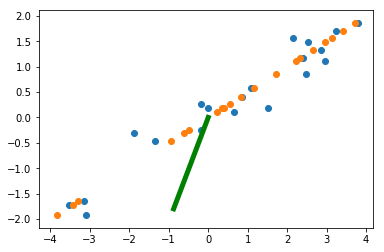

In [65]:
plt.scatter(dataset[:,1], dataset[:,0]) #plot y vs x
plt.scatter(dataset[:,2], dataset[:,0]) #plot y-theoritical vs x
#plot PC1 
plt.plot([0, 2*pc1[0]], [0, 2*pc1[1]],
        color='green', linewidth=5)

## Plotting Regression line on same plot

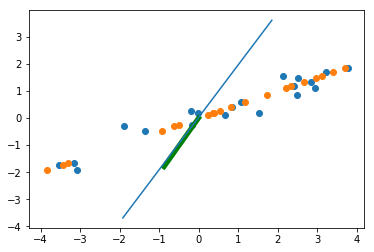

In [67]:
plt.scatter(dataset[:,1], dataset[:,0])
plt.scatter(dataset[:,2], dataset[:,0])
plt.plot([0, 2*pc1[0]], [0, 2*pc1[1]],
        color='green', linewidth=5)
plt.plot(dataset[:,0], y_predicted)

In [1]:

#Yes, PC1 and the regression line axis are same in the plot.

## veriffying results with sklearn

In [2]:


from sklearn import datasets
from sklearn import linear_model

diabetes = datasets.load_diabetes()

In [70]:
x = diabetes.data[:,2]
y = diabetes.target

In [71]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.045, random_state=40)

In [72]:
test_x.shape

(20L,)

In [73]:
test_x

array([-0.03099563, -0.01267283,  0.04121778,  0.03906215,  0.00026092,
        0.04768465,  0.02073935, -0.05794093,  0.02612841, -0.03854032,
        0.01211685, -0.05686312, -0.06117437,  0.0250506 , -0.07626374,
        0.04552903, -0.05901875, -0.00405033, -0.07734155,  0.02828403])

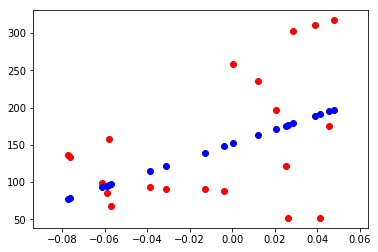

In [74]:
plt.scatter(test_x, test_y, color='r')
plt.scatter(test_x, y_pred, color='b')
# plt.plot(test_x, y_predicted, color='green')

In [75]:
linearRegression = linear_model.LinearRegression()
linearRegression.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))
y_pred = linearRegression.predict(test_x.reshape(-1,1))
y_pred

array([[ 122.11037341],
       [ 139.57355115],
       [ 190.93583863],
       [ 188.88134713],
       [ 151.90050014],
       [ 197.09931312],
       [ 171.41816938],
       [  96.42922967],
       [ 176.55439813],
       [ 114.91965316],
       [ 163.20020339],
       [  97.45647542],
       [  93.34749242],
       [ 175.52715238],
       [  78.96605192],
       [ 195.04482162],
       [  95.40198392],
       [ 147.79151714],
       [  77.93880617],
       [ 178.60888963]])

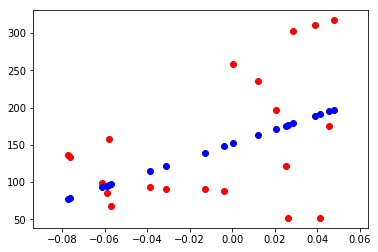

In [78]:
plt.scatter(test_x, test_y, color='r') #plotting testig x vs testing y
plt.scatter(test_x, y_pred, color='b') #plotting testing x vs predicted y

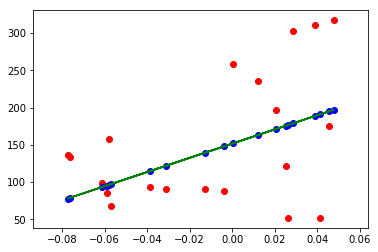

In [79]:
plt.scatter(test_x, test_y, color='r')
plt.scatter(test_x, y_pred, color='b')
plt.plot(test_x, y_pred, color='g')